In [200]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Conditions Boucles Fonction

Définir une fonction qui prend en paramètres les coordonnées cartésiennes des points A,B,C, et D et que retourne : 

- `True` si le point D est à l'intérieur (ou sur les bordures) du triangle ABC.
- `False` autrement.

In [201]:
def is_in_triangle(A, B, C, D):
    def area(x1, y1, x2, y2, x3, y3):
        return abs((x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))/2.0)

    area_ABC = area(A[0], A[1], B[0], B[1], C[0], C[1])
    area_ABD = area(A[0], A[1], B[0], B[1], D[0], D[1])
    area_ACD = area(A[0], A[1], C[0], C[1], D[0], D[1])
    area_BCD = area(B[0], B[1], C[0], C[1], D[0], D[1])

    if area_ABC == area_ABD + area_ACD + area_BCD:
        return True
    else:
        return False

In [202]:
A=(1,-1.5)
B=(-1,1)
C=(2,2.5)
D=(0,1)
print(is_in_triangle(A, B, C, D)) # D(0,1) est à l'intérieur du triangle ABC où A(1,-1.5) B(-1,1) C(2,2.5)
E=(3,2)
F=(-0.5,2.5)
G=(0,0)
H=(-0.5,-0.5)
print(is_in_triangle(E, F, G, H)) # H(-0.5,-0.5) n'est à l'intérieur du triangle ABC où E(3,2) F(-0.5,2.5) G(0,0)


True
False


# Listes Dictionnaires Chaîne de caractères

Définir une fonction qui prend une chaîne de caractères en paramètre et retourne l'équivalent en code Morse ainsi qu'une autre qui fait l'opération inverse.

Plus de détails :
- L'entrée peut être en minuscules ou en majuscules.
- L'entrée peut contenir des chiffres.
- Les autres caractères sont ignorés, sauf pour l'espace qui est repris tel quel.
- Un espace " " est attendu après chaque caractère, sauf le dernier.
- Un code Morse inconnu est toujours remplacé par le caractère '_'

Code Morse pour les caractères de A à Z :
`'.-','-...','-.-.','-..','.','..-.','--.','....','..','.---','-.-','.-..','--','-.','---','.--.','--.-','.-.','...','-','..-','...-','.--','-..-','-.--','--..'`

Code Morse pour les caractères de 0 à 9 :
`'-----','.----','..---','...--','....-','.....','-....','--...','---..','----.'`

In [203]:
# Dictionnaire de correspondance entre les caractères et leur code Morse
morse_code_dict = {
    'A': '.-', 'B': '-...', 'C': '-.-.', 'D': '-..', 'E': '.', 'F': '..-.', 'G': '--.', 'H': '....', 'I': '..', 'J': '.---',
    'K': '-.-', 'L': '.-..', 'M': '--', 'N': '-.', 'O': '---', 'P': '.--.', 'Q': '--.-', 'R': '.-.', 'S': '...', 'T': '-',
    'U': '..-', 'V': '...-', 'W': '.--', 'X': '-..-', 'Y': '-.--', 'Z': '--..',
    '0': '-----', '1': '.----', '2': '..---', '3': '...--', '4': '....-', '5': '.....', '6': '-....', '7': '--...', '8': '---..', '9': '----.',
    ' ': ' '
}

# Fonction pour convertir une chaîne de caractères en code Morse
def encode_morse(texte):
    texte = texte.upper()  # Convertir en majuscules pour correspondre aux clés du dictionnaire
    morse_code = []
    for char in texte:
        if char in morse_code_dict:
            morse_code.append(morse_code_dict[char])
        else:
            morse_code.append('_')  # Caractère inconnu
    return ' '.join(morse_code)

# Fonction pour convertir du code Morse en une chaîne de caractères
def decode_morse(morse):
    morse = morse.split(' ')  # Diviser la chaîne en symboles Morse
    text = []
    for morse_symbol in morse:
        for key, value in morse_code_dict.items():
            if morse_symbol == value:
                text.append(key)
                break
        else:
            text.append('_')  # Symbole Morse inconnu
    return ''.join(text)    

In [204]:
print(encode_morse("fise 3A")) # affiche "..-. .. ... .   ...-- .-"
print(decode_morse("..-. .. ... .   ...-.- .-")) # affiche FISE _A

..-. .. ... .   ...-- .-
FISE___A


# Classes Exceptions Tableaux Numpy  Matplotlib Fichiers

Un graphe est un ensemble de nœuds interconnectés. Il peut être décrit par une liste d'adjacence ou une matrice d'adjacence. 

Pour tout noeuds *i* et *j* : si la connexion *(i--j)* existe sur le graphe, alors on retrouvera le couple `(i, j)` dans la liste d'adjacence. 

Pour décrire un graphe de *n* nœuds avec une  matrice d'adjacence *A*, on utilise une matrice symétrique à valeures binaires de taille *n x n*. La position *A_ij* contient *1* si la connexion *(i--j)* existe sur le graphe, *0* autrement.

Les voisins d'un nœud dans un graphe sont les nœuds qui lui sont directement connectés.

Une marche aléatoire sur un graphe est une suite de nœuds caractérisée par un début et une longueur. Le noeud *i+1* dans la suite est toujours un voisin du nœud *i*.

Définir la classe `Graph` qui gère une telle structure de données :
+ On peut instancier un graphe *G* :
    - En indiquant le nombre de nœuds du graphes ainsi que l'initialisation des connexions (*empty* ou *random*).
    - En passant les couples de connexions en paramètres.
    - En donnant un chemin vers fichier qui contient la liste des connexions (une connexion par ligne).
+ La classe devrait permettre d'ajouter et de supprimer une connexion.
+ La classe devrait permettre d'ajouter et de supprimer un nœud.
+ La classe devrait permettre de récupérer les voisins d'un nœud.
+ La classe devrait permettre d'établir une marche aléatoire sur le graphe.
+ La classe devrait permettre de sauvegarder le graphe (sa liste d'adjacence) à l'instant *t* dans un ficher.
+ `print(G)` affiche une visualisation de la matrice d'adjacence en utilisant `plt.matshow`.
+ Pour les développeurs, l'affichage devrait montrer le nombre de nœuds, le nombre de connexions, et la liste d'adjacence.
+ Pour le code `G = G1 + G2`, G est le graphe G1 union G2.
+ `print(len(G))` affiche le nombre de nœuds du graphe.


Un graphe est non orienté par défaut, cela veut dire que l'ordre d'apparition des noeuds dans le couple de connexion n'importe pas et c'est ce qui fait qui fait que sa matrice d'asjacence soit symetrique. Un graphe orienté par contre, l'ordre influe sur les valeurs *A_ij* et *A_ji* dans la matrice d'adjacence. Les voisins d'un noeud *i* sont les noeuds *j* telque la connexion *(i->j)* existe dans le graphe.  

Définir la classe `DirectedGraph` :
+ On peut instancier un graphe *G* :
    - En indiquant le nombre de nœuds du graphes ainsi que l'initialisation des connexions orientées(*empty* ou *random*).
    - En passant les couples de connexions orientées en paramètres.
    - En donnant un chemin vers fichier qui contient la liste des connexions (une connexion par ligne).
    - En passant une instance de la class `Graph` en paramètre.
+ La classe devrait permettre d'ajouter et de supprimer une connexion.
+ La classe devrait permettre d'ajouter et de supprimer un nœud.
+ La classe devrait permettre de récupérer les voisins d'un nœud.
+ La classe devrait permettre d'établir une marche aléatoire sur le graphe.
+ La classe devrait permettre de sauvegarder le graphe (sa liste d'adjacence) à l'instant *t* dans un ficher.
+ `print(G)` affiche une visualisation de la matrice d'adjacence en utilisant `plt.matshow`.
+ Pour les développeurs, l'affichage devrait montrer le nombre de nœuds, le nombre de connexions, et la liste d'adjacence.
+ `print(G1 + G2)` affiche le nombre de nœuds, le nombre de connexions, et la liste d'adjacence du graphe G1 union G2.
+ `print(len(G))` affiche le nombre de nœuds du graphe.

In [205]:
class Graph:
    def __init__(self, num_nodes, connections=None, from_file=None):
        self.num_nodes = num_nodes
        self.adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
        
        if from_file:
            self.load_from_file(from_file)
        elif connections:
            self.add_connections(connections)

    def add_connections(self, connections):
        for i, j in connections:
            self.add_connection(i, j)

    def add_connection(self, i, j):
        self.adj_matrix[i][j] = 1
        self.adj_matrix[j][i] = 1

    def remove_connection(self, i, j):
        self.adj_matrix[i][j] = 0
        self.adj_matrix[j][i] = 0

    def add_node(self):
        self.num_nodes += 1
        for row in self.adj_matrix:
            row.append(0)
        self.adj_matrix.append([0] * self.num_nodes)

    def remove_node(self, node):
        del self.adj_matrix[node]
        for row in self.adj_matrix:
            del row[node]
        self.num_nodes -= 1

    def get_neighbors(self, node):
        return [i for i, connected in enumerate(self.adj_matrix[node]) if connected]

    def random_walk(self, start_node, steps):
        current_node = start_node
        walk = [current_node]
        for _ in range(steps):
            neighbors = self.get_neighbors(current_node)
            if not neighbors:
                break
            current_node = random.choice(neighbors)
            walk.append(current_node)
        return walk

    def save(self, file_path):
        with open(file_path, 'w') as f:
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    if self.adj_matrix[i][j] == 1:
                        f.write(f"{i} {j}\n")

    def __str__(self):
        num_connections = sum(sum(row) for row in self.adj_matrix) // 2
        return f"Graph with {self.num_nodes} nodes, {num_connections} connections\nAdjacency Matrix:\n{np.array(self.adj_matrix)}"

    def __len__(self):
        return self.num_nodes

class DirectedGraph(Graph):
    def __init__(self, num_nodes, connections=None, from_file=None, from_graph=None):
        super().__init__(num_nodes, connections, from_file)
        if from_graph:
            self.from_graph(from_graph)

    def add_connections(self, connections):
        for i, j in connections:
            self.add_connection(i, j)

    def from_graph(self, graph):
        for i in range(graph.num_nodes):
            for j in graph.get_neighbors(i):
                self.add_connection(i, j)

    def add_connection(self, i, j):
        self.adj_matrix[i][j] = 1

    def remove_connection(self, i, j):
        self.adj_matrix[i][j] = 0

    def __str__(self):
        num_connections = sum(sum(row) for row in self.adj_matrix)
        return f"Directed Graph with {self.num_nodes} nodes, {num_connections} connections\nAdjacency Matrix:\n{np.array(self.adj_matrix)}"

if __name__ == "__main__":
    # Création d'un graphe non orienté
    G = Graph(5, connections=[(0, 1), (1, 2), (2, 3), (3, 4)])
    print(G)
    G.add_node()
    G.add_connection(4, 5)
    G.remove_node(1)
    print(G)
    print("Neighbors of node 2:", G.get_neighbors(2))
    print("Random walk starting from node 0:", G.random_walk(0, 3))
    G.save("graph.txt")

    # Création d'un graphe orienté en utilisant un graphe non orienté
    G1 = Graph(3, connections=[(0, 1), (1, 2)])
    DG = DirectedGraph(3, from_graph=G1)
    print(DG)


Graph with 5 nodes, 4 connections
Adjacency Matrix:
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]
Graph with 5 nodes, 3 connections
Adjacency Matrix:
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]
Neighbors of node 2: [1, 3]
Random walk starting from node 0: [0]
Directed Graph with 3 nodes, 4 connections
Adjacency Matrix:
[[0 1 0]
 [1 0 1]
 [0 1 0]]


### Numpy

Définir une fonction `stairs` qui crée un tableau `numpy`.

La fonction prend en argument un entier `taille` et construit un tableau carré de taille $2*taille+1$.

Aux quatre coins du tableau on trouve la valeur $0$. Dans la case centrale on trouve la valeur $2*taille$.

Si vous partez de n'importe quelle case et que vous vous déplacez d'une case horizontalement ou verticalement vers une cas plus proche du centre, vous incrémentez la valeur du tableau de `1`.

In [206]:
def stairs(size) :
    stairs = np.zeros((2 * size + 1, 2 * size + 1), dtype=int)

    for i in range (size + 1):
        for j in range (size + 1):
            stairs[i, j] = i + j
            stairs[2*size - i, j] = i + j
            stairs[i, 2*size - j] = i + j
            stairs[ 2*size - i, 2*size - j] = i + j
    return stairs

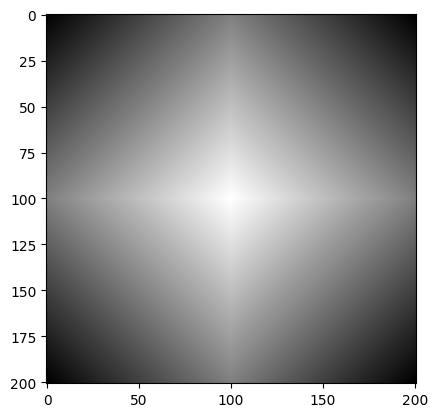

In [207]:
#Visualisation
squares = stairs(100)

squares = squares.astype(float)
# afficher avec une colormap 'gray'
plt.imshow(squares, cmap='gray')

# Pandas Matplotlib

+ Charger le fichier *covid_data.csv* dans un DataFrame.
+ Afficher les 5 premières entrées.
+ Afficher les 5 dernières entrées.
+ Afficher la proportion de valeurs `'NaN'` par colonnes.
+ Réaliser un plot des *'total deaths'* par jour en Italie sur la période 01/09/2020 -- 30/11/2020.
+ Réaliser un plot des nouvelles hospitalisations par jour en France sur la période 01/09/2020 -- 30/11/2020.
+ Réaliser un histogramme de nouveaux cas de covid par semaines en France sur la période 01/06/2020 -- 31/12/2020.
+ Quelle est la moyenne des nouvelles vaccinations par jour en Allemagne sur la période 01/07/2021 -- 30/11/2021 ?
+ Quel est le pays avec le plus de cas de covid au 31/05/2021 ?
+ Quel est nombre de pays concernés par les statistiques sur ce fichier ?
+ Quelle est la date record de nouveaux cas de covid en France ?
+ Bonus : Quelle est la plus longue période sans nouveaux cas enregistrés en France sur la période 01/01/2021 -- 31/12/2021 ? 


## Partie 1
+ Charger le fichier *covid_data.csv* dans un DataFrame.

In [208]:
file_path_2 = "./covid_data.csv"


def load_data_with_lib(file_path_2):
    try:
        df = pd.read_csv(file_path_2, delimiter=';', names=['continent', 'country', 'date', 'total_cases', 'total_deaths', 'total_icu_patients', 'total_hosp_patients', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'median_age', 'aged_65_older', 'aged_70_older', 'population'])
        print(type(df))
        return df
    except FileNotFoundError:
        print("File not found")
        return None
    except:
        print("An error occurred")
        return None
    
df = load_data_with_lib(file_path_2)

<class 'pandas.core.frame.DataFrame'>


/Users/jules/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DtypeWarning: Columns (3,4,5,6,7,8,9,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  


## Partie 2

+ Afficher les 5 premières entrées.
+ Afficher les 5 dernières entrées.
+ Afficher la proportion de valeurs `'NaN'` par colonnes.

In [209]:
# Afficher les 5 premières lignes du DataFrame
print(df.head())

# Afficher les 5 dernières lignes du DataFrame
print(df.tail())

# Afficher la proportion de valeurs 'NaN' par colonnes
nan_proportion = df.isna().mean()
print("\nProportion de valeurs 'NaN' par colonnes :")
print(nan_proportion)

   continent      country        date  total_cases  total_deaths  \
0  continent      country        date  total_cases  total_deaths   
1       Asia  Afghanistan  2020-01-03          NaN           NaN   
2       Asia  Afghanistan  2020-01-04          NaN           NaN   
3       Asia  Afghanistan  2020-01-05          NaN           NaN   
4       Asia  Afghanistan  2020-01-06          NaN           NaN   

   total_icu_patients  total_hosp_patients  total_tests  total_vaccinations  \
0  total_icu_patients  total_hosp_patients  total_tests  total_vaccinations   
1                 NaN                  NaN          NaN                 NaN   
2                 NaN                  NaN          NaN                 NaN   
3                 NaN                  NaN          NaN                 NaN   
4                 NaN                  NaN          NaN                 NaN   

   people_vaccinated  people_fully_vaccinated  median_age  aged_65_older  \
0  people_vaccinated  people_fully_vacci

## Partie 3

+ Réaliser un plot des *'total deaths'* par jour en Italie sur la période 01/09/2020 -- 30/11/2020.

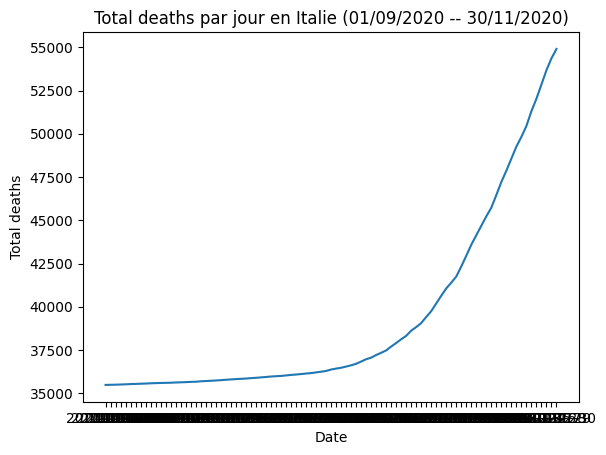

In [210]:
df_italy = df[df['country'] == 'Italy']
df_italy = df_italy[(df_italy['date'] >= '2020-09-01') & (df_italy['date'] <= '2020-11-30')]

plt.plot(df_italy['date'], df_italy['total_deaths'])
plt.title('Total deaths par jour en Italie (01/09/2020 -- 30/11/2020)')
plt.xlabel('Date')
plt.ylabel('Total deaths')
plt.show()

## Partie 4

+ Réaliser un plot des nouvelles hospitalisations par jour en France sur la période 01/09/2020 -- 30/11/2020.

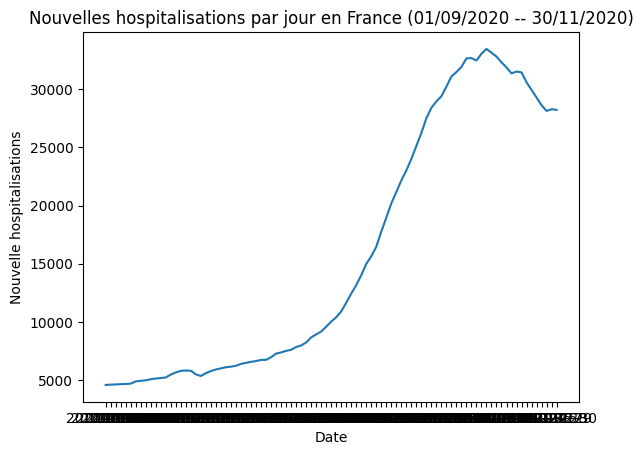

In [179]:
df_france = df[df['country'] == 'France']
df_france = df_france[(df_france['date'] >= '2020-09-01') & (df_france['date'] <= '2020-11-30')]

plt.plot(df_france['date'], df_france['total_hosp_patients'])
plt.title('Nouvelles hospitalisations par jour en France (01/09/2020 -- 30/11/2020)')
plt.xlabel('Date')
plt.ylabel('Nouvelle hospitalisations')
plt.show()

## Partie 5

+ Réaliser un histogramme de nouveaux cas de covid par semaines en France sur la période 01/06/2020 -- 31/12/2020.

/Users/jules/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.
/Users/jules/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  """


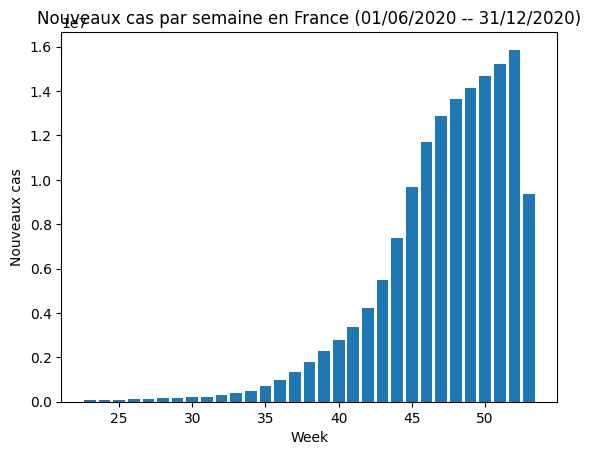

In [211]:
df_france = df[df['country'] == 'France']
df_france = df_france[(df_france['date'] >= '2020-06-01') & (df_france['date'] <= '2020-12-31')]
df_france['date'] = pd.to_datetime(df_france['date'])
df_france['week'] = df_france['date'].dt.week
df_france = df_france.groupby('week').sum()

plt.bar(df_france.index, df_france['total_cases'])
plt.title('Nouveaux cas par semaine en France (01/06/2020 -- 31/12/2020)')

plt.xlabel('Week')
plt.ylabel('Nouveaux cas')
plt.show()

## Partie 6
+ Quelle est la moyenne des nouvelles vaccinations par jour en Allemagne sur la période 01/07/2021 -- 30/11/2021 ?

In [212]:
df_germany = df[df['country'] == 'Germany']
df_germany = df_germany[(df_germany['date'] >= '2021-07-01') & (df_germany['date'] <= '2021-11-30')]

mean_vaccinations = df_germany['total_vaccinations'].mean()

print("La moyenne des nouvelles vaccinations par jour en Allemagne sur la période 01/07/2021 -- 30/11/2021 est de", round(mean_vaccinations, 2))

La moyenne des nouvelles vaccinations par jour en Allemagne sur la période 01/07/2021 -- 30/11/2021 est de 104788628.31


## Partie 7

+ Quel est le pays avec le plus de cas de covid au 31/05/2021 ?

In [213]:
df_max_cases = df[df['date'] == '2021-05-31']
df_max_cases['total_cases'] = pd.to_numeric(df_max_cases['total_cases'], errors='coerce')
df_max_cases = df_max_cases.sort_values(by='total_cases', ascending=False).iloc[0]

print("Le pays avec le plus de cas de COVID-19 au 31/05/2021 est", df_max_cases['country'], "avec", df_max_cases['total_cases'], "cas.")

Le pays avec le plus de cas de COVID-19 au 31/05/2021 est World avec 170052168.0 cas.


/Users/jules/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Partie 8

+ Quel est nombre de pays concernés par les statistiques sur ce fichier ?

In [214]:
num_countries = df['country'].nunique()
print("Nombre de pays concernés par les statistiques dans ce fichier :", num_countries)


Nombre de pays concernés par les statistiques dans ce fichier : 256


## Partie 9

+ Quelle est la date record de nouveaux cas de covid en France ?

In [218]:
df_france = df[df['country'] == 'France']
df_france_max_cases = df_france[df_france['total_cases'] == df_france['total_cases'].max()]

print("La date record de nouveaux cas de COVID-19 en France est le", df_france_max_cases['date'].iloc[0], "avec", df_france_max_cases['total_cases'].iloc[0], "nouveaux cas.")


La date record de nouveaux cas de COVID-19 en France est le 2023-06-25 avec 38997490.0 nouveaux cas.


## Partie 10

+ Bonus : Quelle est la plus longue période sans nouveaux cas enregistrés en France sur la période 01/01/2021 -- 31/12/2021 ? 

In [219]:
df_france = df[df['country'] == 'France']
df_france = df_france[(df_france['date'] >= '2021-01-01') & (df_france['date'] <= '2021-12-31')]

df_france['date'] = pd.to_datetime(df_france['date'])
df_france = df_france.set_index('date')

df_france_no_cases = df_france[df_france['total_cases'] == 0]
df_france_no_cases['total_icu_patients'] = df_france_no_cases.index.to_series().total_icu_patients().dt.days

longest_period = df_france_no_cases['total_icu_patients'].max()
longest_period_start = df_france_no_cases[df_france_no_cases['total_icu_patients'] == longest_period].index[0] - pd.DateOffset(days=longest_period-1)
longest_period_end = df_france_no_cases[df_france_no_cases['total_icu_patients'] == longest_period].index[0]

print("La plus longue période sans nouveaux cas enregistrés en France sur la période 01/01/2021 -- 31/12/2021 est du", longest_period_start.date(), "au", longest_period_end.date(), "soit une durée de", longest_period, "jours.")

AttributeError: 'Series' object has no attribute 'total_icu_patients'